### Importing Necessary Libraries

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/vd/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/vd/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/Users/vd/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 711, in start
    self.io_loop.start()
  File "/Users/vd/anaconda3/l

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/vd/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/vd/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/Users/vd/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 711, in start
    self.io_loop.start()
  File "/Users/vd/anaconda3/l

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/vd/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/vd/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/Users/vd/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 711, in start
    self.io_loop.start()
  File "/Users/vd/anaconda3/l

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/vd/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/vd/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/Users/vd/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 711, in start
    self.io_loop.start()
  File "/Users/vd/anaconda3/l

AttributeError: _ARRAY_API not found

### Loading the Breast Cancer Dataset

We load the Breast Cancer Wisconsin (Diagnostic) Dataset using sklearn.datasets.load_breast_cancer(). This dataset contains 30 features computed from digitized images of a fine needle aspirate (FNA) of a breast mass. The target variable (y) indicates whether the tumor is malignant (1) or benign (0)

In [2]:
# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

In [3]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

### Visualizing Dataset Using PCA

To visualize how separable malignant and benign tumors are in lower dimensions:
- We apply **Principal Component Analysis (PCA)** to reduce the dataset from its original 30 dimensions down to just two principal components.
- We then create a scatter plot where benign tumors are shown in blue and malignant tumors in orange.

This visualization gives us an idea of how well-separated these two classes are in reduced dimensions.

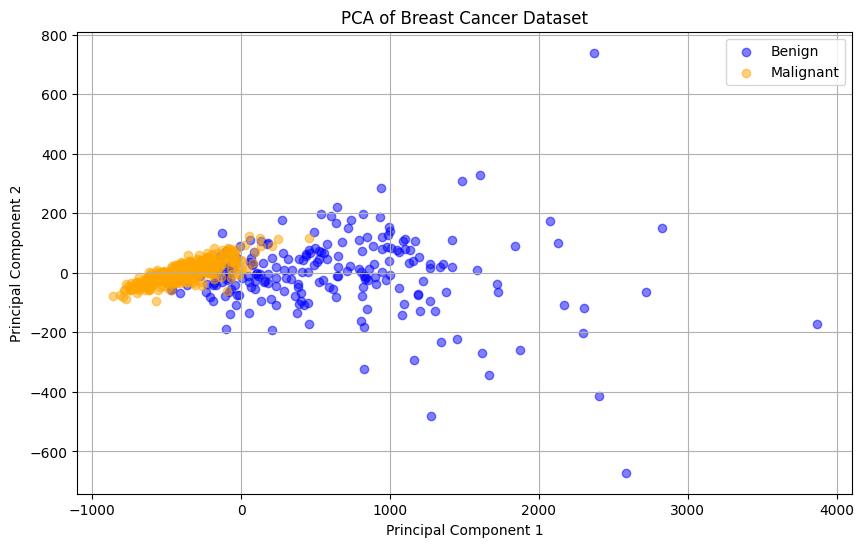

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA to reduce the features to 2 dimensions
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Create a scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[y == 0, 0], X_reduced[y == 0, 1], label='Benign', alpha=0.5, color='blue')
plt.scatter(X_reduced[y == 1, 0], X_reduced[y == 1, 1], label='Malignant', alpha=0.5, color='orange')
plt.title('PCA of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

### Splitting and Preprocessing the Data

Here we split the dataset into training and testing sets using an 80/20 split. The training set will be used to train the model, while the test set will be used to evaluate its performance.

Next, we apply StandardScaler to normalize the features. This ensures that all features have a mean of 0 and a standard deviation of 1, which helps in faster convergence during model training.

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Building the TensorFlow Model

We define a neural network using TensorFlow's Sequential API:

- First layer: Dense with 64 units and ReLU activation
- Subsequent layers: Dense with BatchNormalization and Dropout (30%)
- Final layer: 1 unit with sigmoid activation for binary classification

Model compilation:
- **Optimizer**: Adam
- **Loss**: Binary crossentropy
- **Metric**: Accuracy

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(30,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

/Users/vd/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,057 (19.75 KB)

 Trainable params: 4,833 (18.88 KB)

 Non-trainable params: 224 (896.00 B)

### Training the Model

- We use an 80/20 validation split from the training data.
- The model will train for up to 100 epochs with a batch size of 32.
- We implement early stopping, which stops training if validation loss doesn't improve for 10 consecutive epochs and restores the best weights.

In [8]:
# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5105 - loss: 0.8508 - val_accuracy: 0.7253 - val_loss: 0.6125
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6904 - loss: 0.5969 - val_accuracy: 0.8791 - val_loss: 0.5002
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7829 - loss: 0.4662 - val_accuracy: 0.9121 - val_loss: 0.4269
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8517 - loss: 0.4040 - val_accuracy: 0.9121 - val_loss: 0.3698
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8827 - loss: 0.3088 - val_accuracy: 0.9341 - val_loss: 0.3296
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8678 - loss: 0.3275 - val_accuracy: 0.9341 - val_loss: 0.3010
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9049 - loss: 0.2607 - val_accuracy: 0.9341 - val_loss: 0.2737
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9265 - loss: 0.2290 - val_accuracy: 0.9451 - v

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9872 - loss: 0.0496 - val_accuracy: 0.9560 - val_loss: 0.0901
Epoch 52/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9716 - loss: 0.0811 - val_accuracy: 0.9560 - val_loss: 0.0972
Epoch 53/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9713 - loss: 0.0670 - val_accuracy: 0.9560 - val_loss: 0.1012
Epoch 54/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9899 - loss: 0.0525 - val_accuracy: 0.9560 - val_loss: 0.0908
Epoch 55/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9633 - loss: 0.0916 - val_accuracy: 0.9670 - val_loss: 0.0900
Epoch 56/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9493 - loss: 0.1857 - val_accuracy: 0.9780 - val_loss: 0.0877
Epoch 57/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9755 - loss: 0.0592 - val_accuracy: 0.9780 - val_loss: 0.0895


### Evaluating Model Performance

After training, This provides us with both loss and accuracy metrics on how well our model generalizes to new data.

In [9]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.9446 - loss: 0.1132
Test accuracy: 0.9474


### Making Predictions and Classification Report

We use our trained model to make predictions on the test set. Since this is a binary classification problem, we convert probabilities greater than 0.5 to class 1 (malignant) and those less than or equal to 0.5 to class 0 (benign).

Finally, we print a classification report, which includes precision, recall, F1-score, and support for both classes.

In [10]:
# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_classes))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### Visualizing Training History

We visualize how accuracy and loss evolved during training by plotting both training and validation metrics across epochs. This helps us understand whether our model was overfitting or underfitting based on how well it performed on validation data compared to training data.

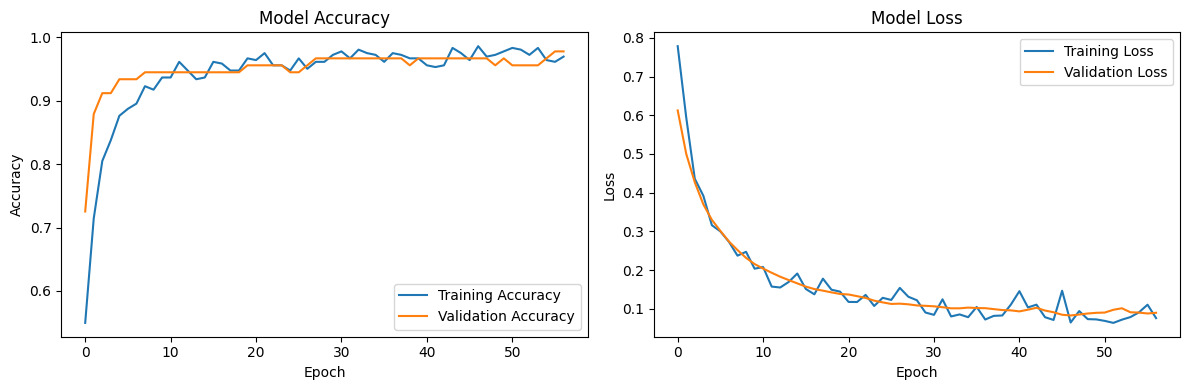

In [11]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Conclusion

This project demonstrates the potential of machine learning in breast cancer diagnosis. Our model achieved high accuracy in classifying tumors as malignant or benign, showcasing the power of neural networks in medical applications. While promising, it's crucial to remember that such models should complement, not replace, expert medical judgment. Future work could involve larger datasets, more diverse patient populations, and potential clinical trials to further validate and improve the model's performance.